In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[43 50 51 ... 41 41 37]
 [40 47 53 ... 39 41 39]
 [47 49 51 ... 42 38 38]
 ...
 [18 23 23 ... 43 42 41]
 [15 20 26 ... 44 44 39]
 [ 9 17 20 ... 44 42 42]]


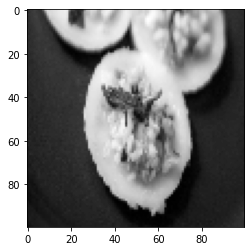

In [15]:
datadir = "/content/drive/MyDrive/10 loại món ăn VN/10loaimonanVN"
categories=['banh beo','banh trang nuong','bun bo hue','bun dau mam tom','bun rieu','chao long','com tam','hu tieu','my quang','pho']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [16]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 20/20 [00:18<00:00,  1.09it/s]

200


In [17]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (200, 100, 100, 1)
y (200,)


In [18]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/10 loại món ăn VN/10loaimonanVN/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/10 loại món ăn VN/10loaimonanVN/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [19]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [20]:
pickle_in = open("/content/drive/MyDrive/10 loại món ăn VN/10loaimonanVN/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/10 loại món ăn VN/10loaimonanVN/Save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (200, 100, 100, 1)
y (200,)


In [21]:
y= to_categorical(y,10)

In [22]:
y.shape

(200, 10)

In [23]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [25]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=200,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/200
3/3 [==============================] - 2s 574ms/step - loss: 2.6962 - accuracy: 0.1562 - val_loss: 4.4729 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 60ms/step - loss: 2.2609 - accuracy: 0.1250 - val_loss: 3.6974 - val_accuracy: 0.0000e+00
Epoch 3/200
3/3 [==============================] - 0s 60ms/step - loss: 2.1629 - accuracy: 0.1625 - val_loss: 3.8763 - val_accuracy: 0.0000e+00
Epoch 4/200
3/3 [==============================] - 0s 61ms/step - loss: 2.1031 - accuracy: 0.1562 - val_loss: 5.8215 - val_accuracy: 0.0000e+00
Epoch 5/200
3/3 [==============================] - 0s 57ms/step - loss: 2.0339 - accuracy: 0.2750 - val_loss: 9.4458 - val_accuracy: 0.0000e+00
Epoch 6/200
3/3 [==============================] - 0s 59ms/step - loss: 2.0723 - accuracy: 0.1125 - val_loss: 8.6235 - val_accuracy: 0.0000e+00
Epoch 7/200
3/3 [==============================] - 0s 59ms/step - loss: 1.8750 - accuracy: 0.3625 - val_loss: 9.2522 - val_accuracy: 0.

In [26]:
model.save('foodvn.h5')

In [27]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'banh beo',1:'banh trang nuong',2:'bun bo hue',3:'bun dau mam tom',4:'bun rieu',5:'chao long',6:'com tam',7:'hu tieu',8:'my quang',9:'pho' }
model = load_model('foodvn.h5')

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation bun rieu


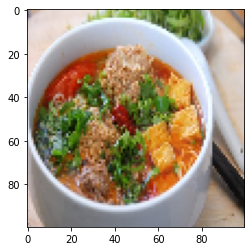

In [28]:
# load model
img = load_image('bunreal.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])